In [108]:
from spectral_cube import SpectralCube
from pvextractor import extract_pv_slice, Path
import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from matplotlib.colors import LogNorm
from astropy.visualization.stretch import SinhStretch
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from cycler import cycler
from itertools import cycle
from scipy.stats import ks_2samp
from scipy.optimize import fsolve
from spectral_cube import Projection
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
from reproject.mosaicking import find_optimal_celestial_wcs


In [53]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/B1/b/TP/2018.1.00862.S/spw29_13CO/

brad29.fits*                                            mom0_B1_29.image/
brad29.image/                                           mom0_CM_29.image/
fixed29.image/                                          mom0_F3_29.image/
immoments.last*                                         mom0_LR_29.image/
member.uid___A001_X133e_X48.Bania1.spw29.I.sd.im.fits*  mom0_N3_29.image/
mom0_2_B1_29.image/                                     mom1_B1_29.image/
mom0_2_CM_29.image/                                     mom2_B1_29.image/
mom0_2_F3_29.image/                                     over29.admit/
mom0_2_LR_29.image/                                     try1_cont29.image/
mom0_2_N3_29.image/


In [73]:
#cube_23b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw23.im', format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube_23b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)

#cube_25b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw25.im', format='casa_image').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
#cube_25b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits').with_spectral_unit(u.GHz, velocity_convention='radio').to(u.K)
# '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits'

cube_23_b1a = SpectralCube.read('/orange/adamginsburg/cmz/g5/B1/a/TP/2018.1.00862.S/spw23_H2CO/fixed23.image', format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)
cube_25_b1a = SpectralCube.read('/orange/adamginsburg/cmz/g5/B1/a/TP/2018.1.00862.S/spw25_H2CO/fixed25.image', format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)
cube_29_b1a = SpectralCube.read('/orange/adamginsburg/cmz/g5/B1/a/TP/2018.1.00862.S/spw29_13CO/fixed29.image', format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)

cube_23_b1b = SpectralCube.read('/orange/adamginsburg/cmz/g5/B1/b/TP/2018.1.00862.S/spw23_H2CO/fixed23.image', format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)
cube_25_b1b = SpectralCube.read('/orange/adamginsburg/cmz/g5/B1/b/TP/2018.1.00862.S/spw25_H2CO/fixed25.image', format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)
cube_29_b1b = SpectralCube.read('/orange/adamginsburg/cmz/g5/B1/b/TP/2018.1.00862.S/spw29_13CO/fixed29.image', format='casa_image').with_spectral_unit(u.km/u.second, velocity_convention='radio').to(u.K)

cube_23_g5b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw23.im', format='casa_image').with_spectral_unit(u.km/u.s, velocity_convention='radio').to(u.K)
cube_25_g5b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.H2CO.spw25.im', format='casa_image').with_spectral_unit(u.km/u.s, velocity_convention='radio').to(u.K)
cube_29_g5b = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/combo/cubes/g5b.13CO.spw29.im', format='casa_image').with_spectral_unit(u.km/u.s, velocity_convention='radio').to(u.K)


/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encou

In [74]:
def noise_mask(cube, vmin, vmax, level):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def noise_mask_slab(cube, vmin, vmax, level, cut1, cut2):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.spectral_slab(cut1, cut2).max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def get_x(mom0):
    ww = wcs.WCS(mom0.header)
    pixelarea = ww.proj_plane_pixel_area()#.to(u.sr)
    #np.sqrt(pixelarea.to(u.rad**2)).to(u.arcsecond)
    x = range(mom0.shape[1]) * np.sqrt(pixelarea.to(u.rad**2)).to(u.arcmin)
    return x

def t_kin(ratio):
    # ratio of spw 23 / spw 25
    return 590*np.power(ratio, 2) + 2.88*ratio + 23.4

In [83]:
#mask_23b = noise_mask(cube_23b, 50*u.km/u.second, 80 *u.km/u.second, 5)
mask_23_b1a = noise_mask(cube_23_b1a, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_25_b1a = noise_mask(cube_25_b1a, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_29_b1a = noise_mask(cube_29_b1a, -100*u.km/u.second, -50 *u.km/u.second, 5)

mask_23_b1b = noise_mask(cube_23_b1b, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_25_b1b = noise_mask(cube_25_b1b, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_29_b1b = noise_mask(cube_29_b1b, -100*u.km/u.second, -50 *u.km/u.second, 5)

mask_23_g5b = noise_mask(cube_23_g5b, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_25_g5b = noise_mask(cube_25_g5b, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_29_g5b = noise_mask(cube_29_g5b, -100*u.km/u.second, -50 *u.km/u.second, 5)

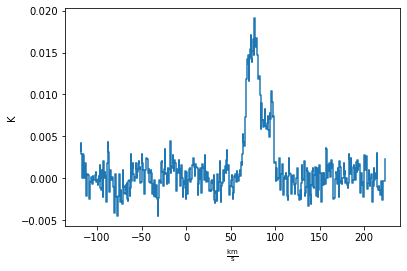

In [42]:
spec_23_b1a = cube_23_b1a.with_mask(mask_23_b1a).mean(axis=(1,2))
spec_23_b1a.quicklook()

INFO: Auto-setting vmin to -1.029e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.660e-01 [aplpy.core]


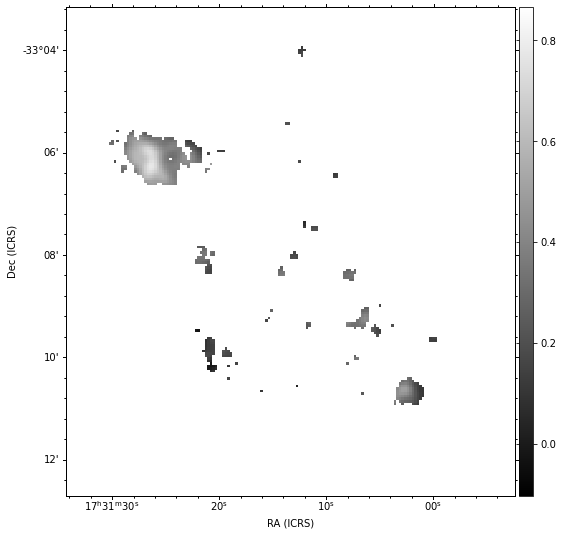

In [28]:
mom0_23_b1a = cube_23_b1a.with_mask(mask_23_b1a).moment0()
mom0_23_b1a.quicklook()

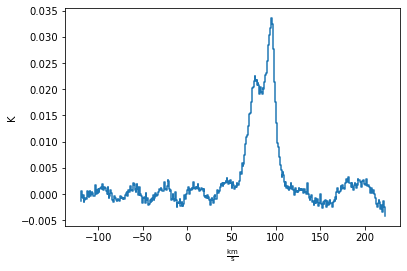

In [43]:
spec_25_b1a = cube_25_b1a.with_mask(mask_25_b1a).mean(axis=(1,2))
spec_25_b1a.quicklook()

INFO: Auto-setting vmin to -4.967e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.813e+00 [aplpy.core]


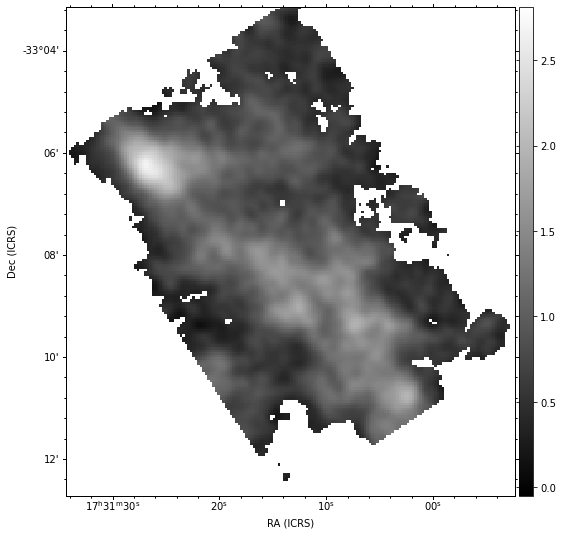

In [32]:
mom0_25_b1a = cube_25_b1a.with_mask(mask_25_b1a).moment0()
mom0_25_b1a.quicklook()

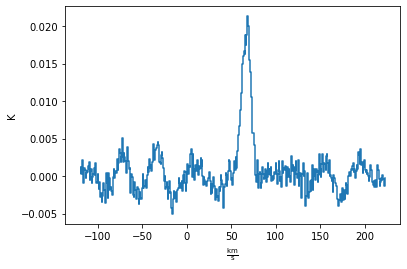

In [44]:
spec_23_b1b = cube_23_b1b.with_mask(mask_23_b1b).mean(axis=(1,2))
spec_23_b1b.quicklook()

INFO: Auto-setting vmin to -5.137e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.569e-01 [aplpy.core]


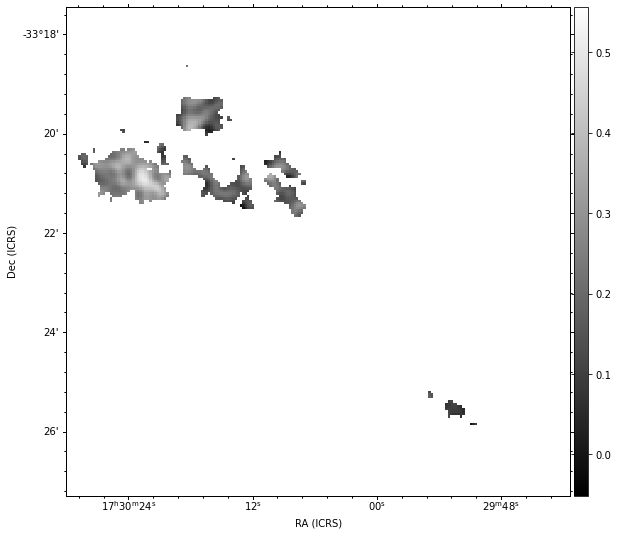

In [47]:
mom0_23_b1b = cube_23_b1b.with_mask(mask_23_b1b).moment0()
mom0_23_b1b.quicklook()

INFO: Auto-setting vmin to -1.630e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.100e-02 [aplpy.core]


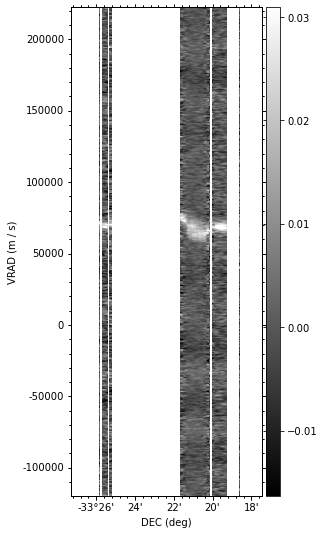

In [45]:
spec_23_b1b = cube_23_b1b.with_mask(mask_23_b1b).mean(axis=2)
spec_23_b1b.quicklook()

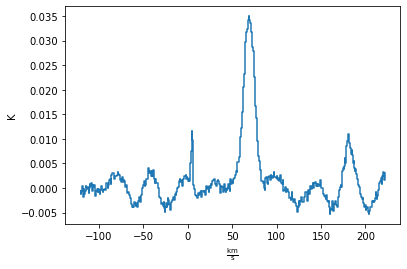

In [46]:
spec_25_b1b = cube_25_b1b.with_mask(mask_25_b1b).mean(axis=(1,2))
spec_25_b1b.quicklook()

INFO: Auto-setting vmin to -1.667e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.851e+00 [aplpy.core]


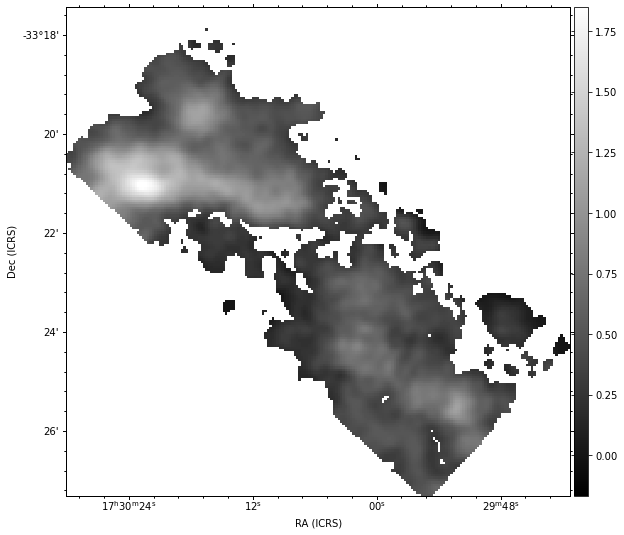

In [48]:
mom0_25_b1b = cube_25_b1b.with_mask(mask_25_b1b).moment0()
mom0_25_b1b.quicklook()

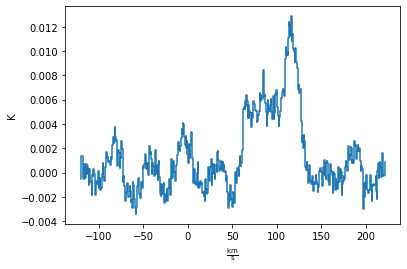

In [84]:
spec_23_g5b = cube_23_g5b.with_mask(mask_23_g5b).mean(axis=(1,2))
spec_23_g5b.quicklook()

INFO: Auto-setting vmin to -2.958e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.520e+00 [aplpy.core]


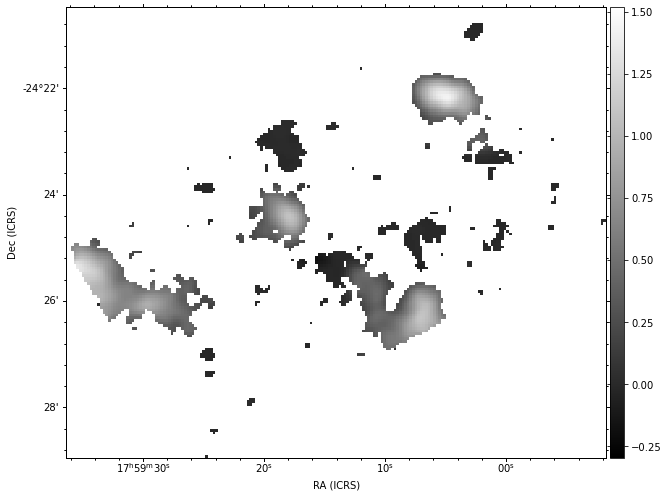

In [85]:
mom0_23_g5b = cube_23_g5b.with_mask(mask_23_g5b).moment0()
mom0_23_g5b.quicklook()

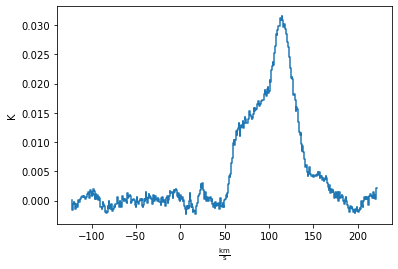

In [86]:
spec_25_g5b = cube_25_g5b.with_mask(mask_25_g5b).mean(axis=(1,2))
spec_25_g5b.quicklook()

INFO: Auto-setting vmin to -1.869e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.025e+00 [aplpy.core]


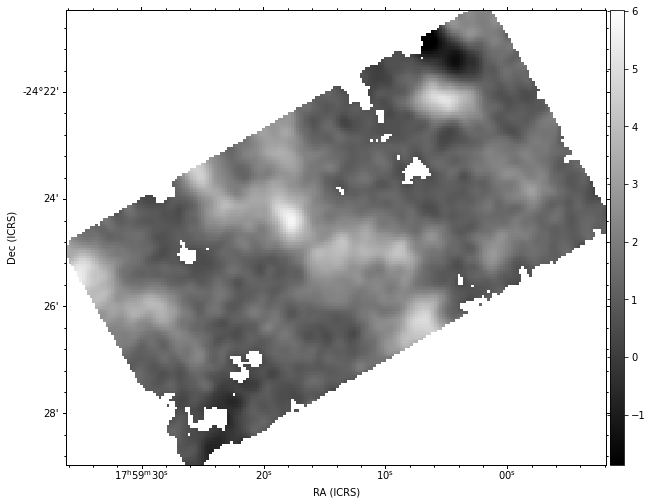

In [87]:
mom0_25_g5b = cube_25_g5b.with_mask(mask_25_g5b).moment0()
mom0_25_g5b.quicklook()

INFO: Auto-setting vmin to -9.468e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.724e-01 [aplpy.core]


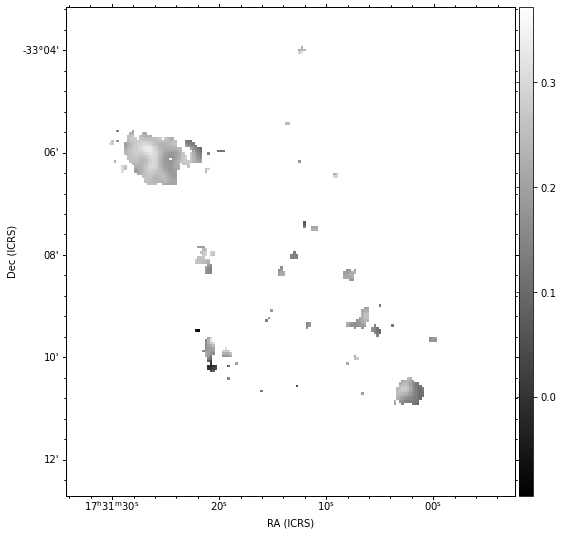

In [88]:
ratio_2325_b1a = mom0_23_b1a / mom0_25_b1a.reproject(mom0_23_b1a.header)
#cube_23.with_mask(mask_23).moment0() / cube_25.reproject(cube_23.header).with_mask(mask_23).moment0()
ratio_2325_b1a.quicklook()

INFO: Auto-setting vmin to  7.337e-03 [aplpy.core]
INFO: Auto-setting vmax to  5.197e-01 [aplpy.core]


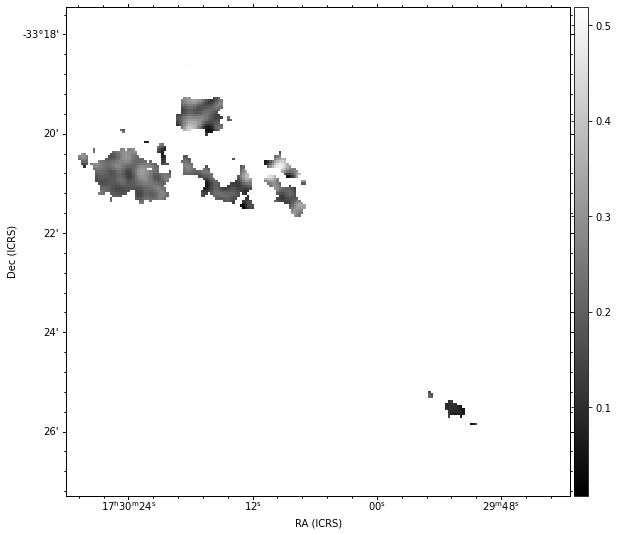

In [89]:
ratio_2325_b1b = mom0_23_b1b / mom0_25_b1b.reproject(mom0_23_b1b.header)
#cube_23.with_mask(mask_23).moment0() / cube_25.reproject(cube_23.header).with_mask(mask_23).moment0()
ratio_2325_b1b.quicklook()

INFO: Auto-setting vmin to -7.292e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.745e-01 [aplpy.core]


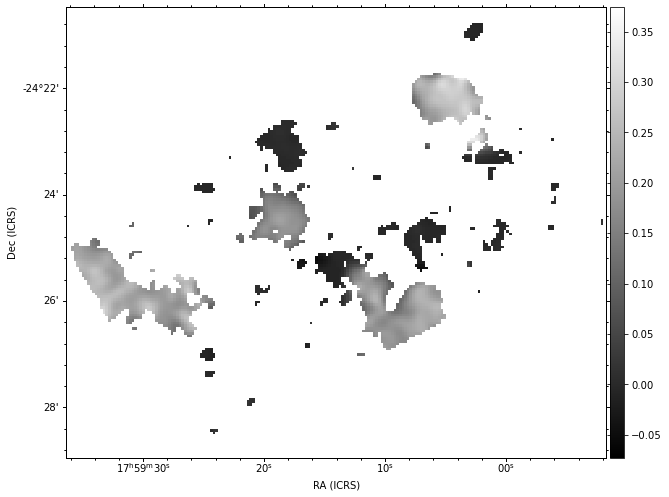

In [90]:
ratio_2325_g5b = mom0_23_g5b / mom0_25_g5b.reproject(mom0_23_g5b.header)
#cube_23.with_mask(mask_23).moment0() / cube_25.reproject(cube_23.header).with_mask(mask_23).moment0()
ratio_2325_g5b.quicklook()

INFO: Auto-setting vmin to  1.828e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.161e+01 [aplpy.core]
INFO: Auto-setting vmin to  1.691e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.676e+01 [aplpy.core]


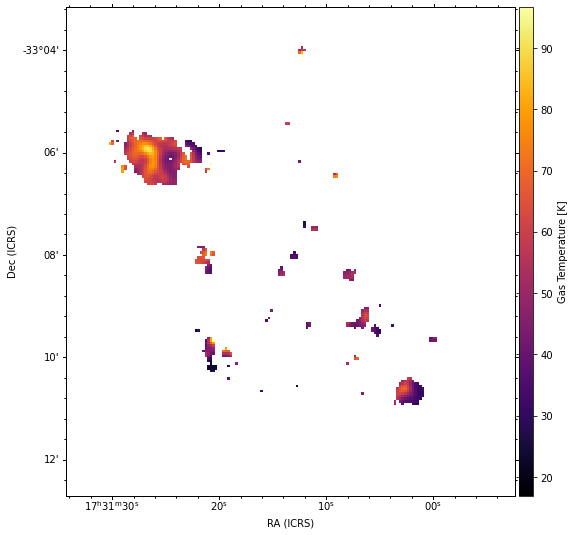

In [91]:
temp_all_b1a = t_kin(ratio_2325_b1a)#.reproject()
temp_all_b1a[temp_all_b1a>200] = np.nan
temp_all_b1a.quicklook()
temp_all_b1a.FITSFigure.colorbar.set_axis_label_text('Gas Temperature [K]')
temp_all_b1a.FITSFigure.show_colorscale(cmap='inferno')

INFO: Auto-setting vmin to  1.071e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.804e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.205e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.701e+02 [aplpy.core]


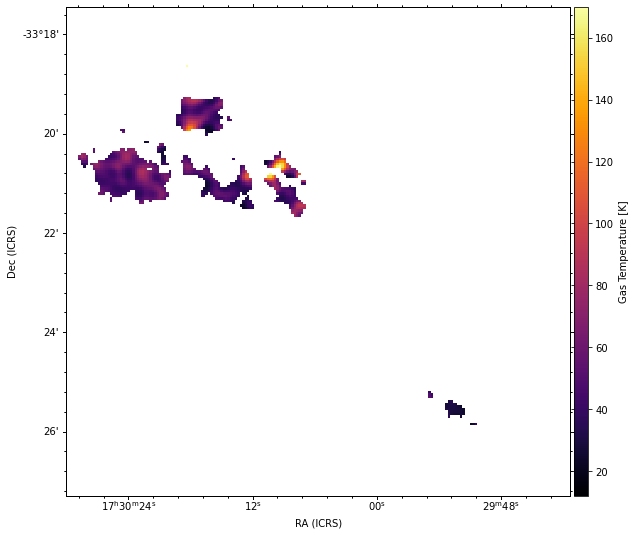

In [92]:
temp_all_b1b = t_kin(ratio_2325_b1b)#.reproject()
temp_all_b1b[temp_all_b1b>200] = np.nan
temp_all_b1b.quicklook()
temp_all_b1b.FITSFigure.colorbar.set_axis_label_text('Gas Temperature [K]')
temp_all_b1b.FITSFigure.show_colorscale(cmap='inferno')

INFO: Auto-setting vmin to  1.752e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.865e+01 [aplpy.core]
INFO: Auto-setting vmin to  1.752e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.859e+01 [aplpy.core]


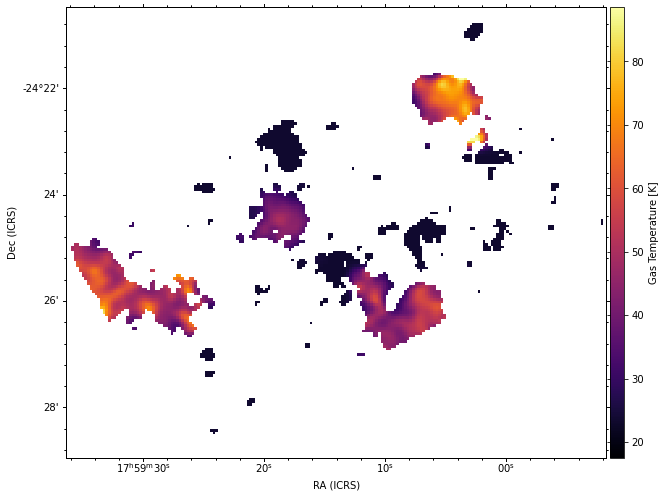

In [93]:
temp_all_g5b = t_kin(ratio_2325_g5b)#.reproject()
temp_all_g5b[temp_all_g5b>200] = np.nan
temp_all_g5b.quicklook()
temp_all_g5b.FITSFigure.colorbar.set_axis_label_text('Gas Temperature [K]')
temp_all_g5b.FITSFigure.show_colorscale(cmap='inferno')

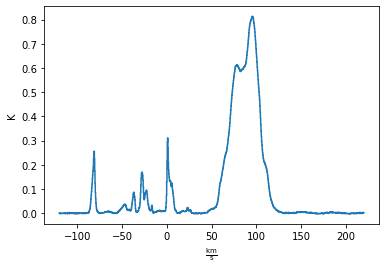

In [94]:
spec_29_b1a = cube_29_b1a.with_mask(mask_29_b1a).mean(axis=(1,2))
spec_29_b1a.quicklook()

INFO: Auto-setting vmin to  1.247e+01 [aplpy.core]
INFO: Auto-setting vmax to  5.560e+01 [aplpy.core]


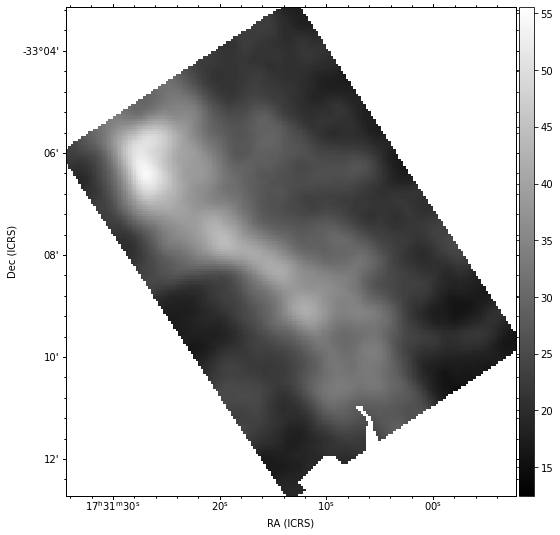

In [66]:
mom0_29_b1a = cube_29_b1a.with_mask(mask_29_b1a).spectral_slab(40*u.km/u.second, 150*u.km/u.second).moment0()
mom0_29_b1a.quicklook()

INFO: Auto-setting vmin to  1.778e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.266e+01 [aplpy.core]
INFO: Auto-setting vmin to  1.784e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.292e+01 [aplpy.core]
INFO: Auto-setting resolution to 28.8447 dpi [aplpy.core]


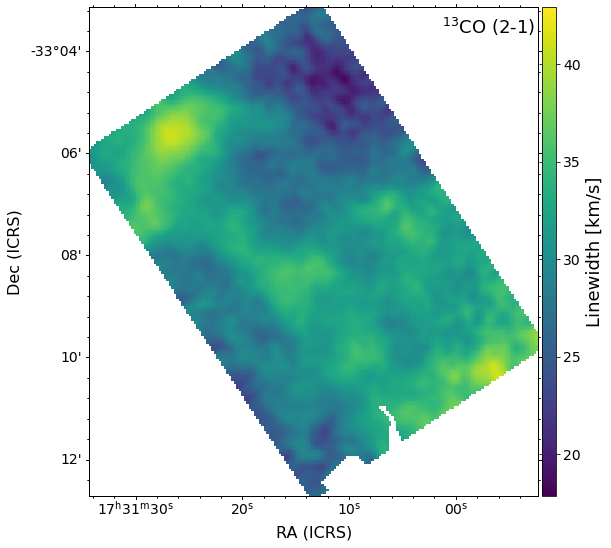

In [113]:
mom2_29_b1a = cube_29_b1a.with_mask(mask_29_b1a).spectral_slab(40*u.km/u.second, 150*u.km/u.second).linewidth_fwhm()
mom2_29_b1a.quicklook()
mom2_29_b1a.FITSFigure.show_colorscale(cmap='viridis')
mom2_29_b1a.FITSFigure.colorbar.set_axis_label_text('Linewidth [km/s]')
mom2_29_b1a.FITSFigure.colorbar.set_axis_label_font(size=18)
mom2_29_b1a.FITSFigure.colorbar.set_font(size=14)
mom2_29_b1a.FITSFigure.axis_labels.set_font(size=16)
mom2_29_b1a.FITSFigure.tick_labels.set_font(size=14)
mom2_29_b1a.FITSFigure.add_label(0.89, 0.96, "$^{13}$CO (2-1)", relative=True, size=18)
mom2_29_b1a.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_29_b1a.pdf')

In [128]:
find_optimal_celestial_wcs(mom2_29_b1a.shape, mom2_29_b1a.header, frame='galactic')

TypeError: find_optimal_celestial_wcs() got multiple values for argument 'frame'

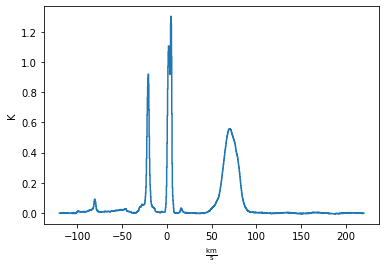

In [63]:
spec_29_b1b = cube_29_b1b.with_mask(mask_29_b1b).mean(axis=(1,2))
spec_29_b1b.quicklook()

INFO: Auto-setting vmin to  3.380e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.867e+01 [aplpy.core]


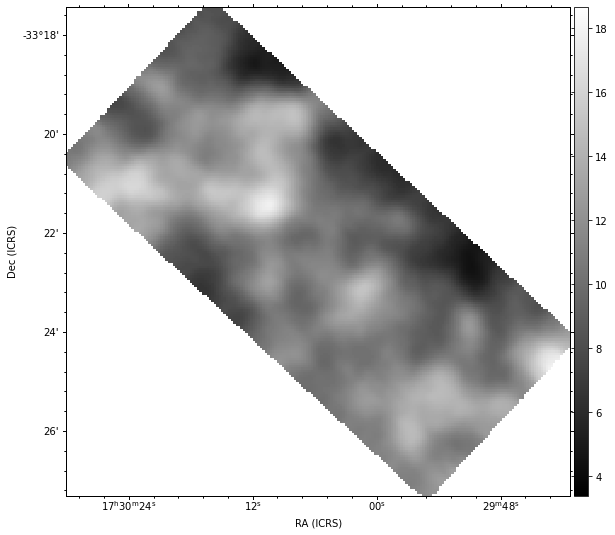

In [70]:
mom0_29_b1b = cube_29_b1b.with_mask(mask_29_b1b).spectral_slab(40*u.km/u.second, 100*u.km/u.second).moment0()
mom0_29_b1b.quicklook()

INFO: Auto-setting vmin to  7.811e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.850e+01 [aplpy.core]
INFO: Auto-setting vmin to  7.465e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.845e+01 [aplpy.core]
INFO: Auto-setting resolution to 29.7277 dpi [aplpy.core]


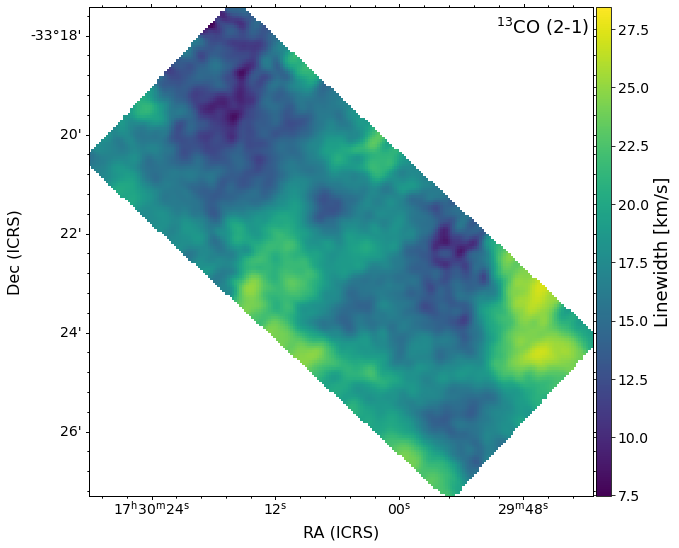

In [114]:
mom2_29_b1b = cube_29_b1b.with_mask(mask_29_b1b).spectral_slab(40*u.km/u.second, 100*u.km/u.second).linewidth_fwhm()
mom2_29_b1b.quicklook()
mom2_29_b1b.FITSFigure.show_colorscale(cmap='viridis')
mom2_29_b1b.FITSFigure.colorbar.set_axis_label_text('Linewidth [km/s]')
mom2_29_b1b.FITSFigure.colorbar.set_axis_label_font(size=18)
mom2_29_b1b.FITSFigure.colorbar.set_font(size=14)
mom2_29_b1b.FITSFigure.axis_labels.set_font(size=16)
mom2_29_b1b.FITSFigure.tick_labels.set_font(size=14)
mom2_29_b1b.FITSFigure.add_label(0.9, 0.96, "$^{13}$CO (2-1)", relative=True, size=18)
mom2_29_b1b.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_29_b1b.pdf')

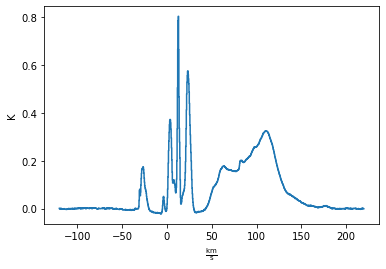

In [95]:
spec_29_g5b = cube_29_g5b.with_mask(mask_29_g5b).mean(axis=(1,2))
spec_29_g5b.quicklook()

INFO: Auto-setting vmin to -8.226e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.681e+01 [aplpy.core]


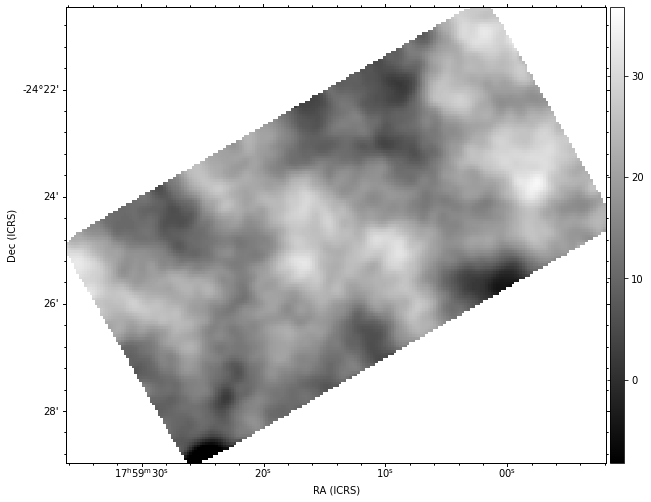

In [96]:
mom0_29_g5b = cube_29_g5b.with_mask(mask_29_g5b).spectral_slab(40*u.km/u.second, 200*u.km/u.second).moment0()
mom0_29_g5b.quicklook()

INFO: Auto-setting vmin to -1.709e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.195e+01 [aplpy.core]
INFO: Auto-setting vmin to -1.702e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.208e+01 [aplpy.core]
INFO: Auto-setting resolution to 27.4667 dpi [aplpy.core]


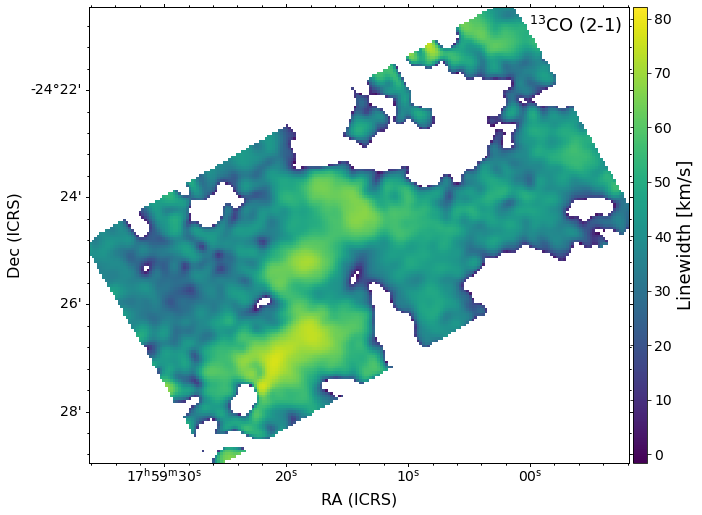

In [115]:
mom2_29_g5b = cube_29_g5b.with_mask(mask_29_g5b).spectral_slab(40*u.km/u.second, 200*u.km/u.second).linewidth_fwhm()
mom2_29_g5b[mom2_29_g5b>120*u.km/u.s] = np.nan
mom2_29_g5b.quicklook()
mom2_29_g5b.FITSFigure.show_colorscale(cmap='viridis')
mom2_29_g5b.FITSFigure.colorbar.set_axis_label_text('Linewidth [km/s]')
mom2_29_g5b.FITSFigure.colorbar.set_axis_label_font(size=18)
mom2_29_g5b.FITSFigure.colorbar.set_font(size=14)
mom2_29_g5b.FITSFigure.axis_labels.set_font(size=16)
mom2_29_g5b.FITSFigure.tick_labels.set_font(size=14)
mom2_29_g5b.FITSFigure.add_label(0.9, 0.96, "$^{13}$CO (2-1)", relative=True, size=18)
mom2_29_g5b.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_29_g5b.pdf')